# Week1: Implementation of Perceptron with Sickit Learn

This notebook serves as part of the **Computer Intelligence and its Applications in Mechatronics** course at **Amirkabir University of Technology**. In this section, we explore the foundational concepts of Perceptrons, a type of artificial neural network.

### Importing Libraries

In this section, we import several essential libraries required to create, train, and evaluate the Perceptron model:

- **`make_classification`**: Generates synthetic datasets for classification tasks.
- **`numpy`**: Provides support for numerical operations and array manipulation.
- **`matplotlib.pyplot`**: Used for plotting and visualizing data and results.
- **`train_test_split`**: Splits the dataset into training and test sets.
- **`StandardScaler`**: Standardizes the features to ensure better model performance.
- **`Perceptron`**: Implements the Perceptron algorithm for binary classification.
- **`accuracy_score`**: Evaluates the accuracy of the model by comparing predicted and true labels.
- **`mean_squared_error`**: Measures the mean squared error between predicted and actual labels.

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

### Generating and Visualizing Data

In this section, we generate a synthetic dataset for classification using `make_classification`. The dataset consists of 200 samples with 2 features, and the classes are well-separated for easy classification:

- **`make_classification`**: Generates synthetic data for classification.
  - We specify that the dataset should have 2 informative features and 2 classes.
  - We set the class separation to 10 to ensure the classes are well-separated, which helps the model learn the decision boundary more easily.

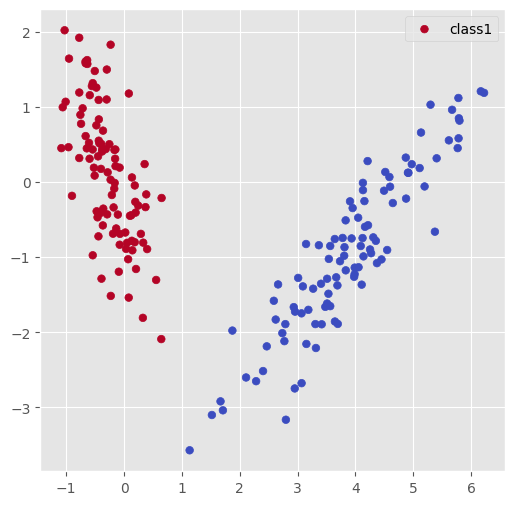

In [2]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',s=30)
plt.legend(['class1','class2'])
plt.show()

### Per-Processing
Before training the Perceptron, we need to split the data into **training** and **test** sets and **standardize** the features:

1. **Splitting the data**:
   - We use `train_test_split` to divide the dataset into training and test sets. The training set contains 75% of the data, while the test set contains 25%.
   - The `random_state=42` ensures that the split is reproducible.

In [6]:
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

2. **Standardization**:
   - We apply the `StandardScaler` to standardize the features. Standardization helps improve model convergence by scaling the features to have a mean of 0 and a standard deviation of 1.
   - We apply the scaler on the training set using `fit_transform()`, and then use `transform()` on the test set, ensuring the test set is scaled using the parameters of the training set.

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

3. **Data Shapes**:
   - The shape of the training and test data is printed to verify that the data has been correctly split and scaled.

In [8]:
print('shape of training data ',X_train.shape)
print('shape of test data ',X_test.shape)

shape of training data  (150, 2)
shape of test data  (50, 2)


### Training Procedure with sklearn

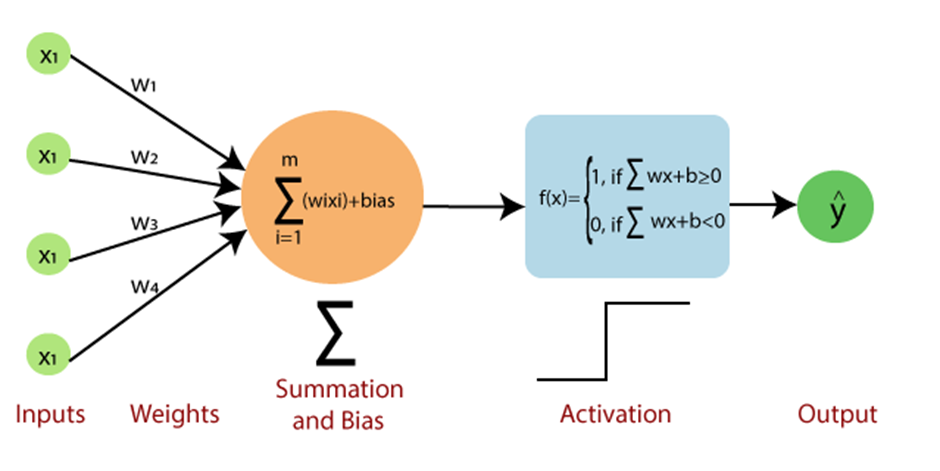

In this section, we train the Perceptron model on the training data and evaluate its performance on the test set:

1. **Model Initialization**:
   - The `Perceptron` model is initialized with a maximum of 1000 iterations, a tolerance of `1e-3` for convergence, and a fixed random seed for reproducibility.

2. **Model Training**:
   - The model is trained using the `fit()` method, which adjusts the model's weights based on the training data.

3. **Prediction and Evaluation**:
   - After training, the model predicts the labels for the test set using the `predict()` method.
   - We evaluate the model’s performance by calculating the **accuracy** using `accuracy_score()`, which compares the predicted labels (`y_pred`) with the true labels (`y_test`).

4. **Accuracy**:
   - The accuracy score is printed to show how well the model performed on the test set. A higher accuracy means the model is making more correct predictions.

The model should achieve a high accuracy since the data is well-separated, which simplifies the classification task.

In [9]:
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


### Extracting the Model Coefficients and Bias

In this section, we extract and print the learned **weights** and **bias** of the Perceptron model:

1. **Weights**:
   - The coefficients (`model.coef_`) are the weights assigned to each feature of the input data. These weights determine the importance of each feature in making predictions. A higher absolute value of a coefficient indicates a stronger influence of the corresponding feature.

2. **Bias**:
   - The bias (`model.intercept_`) allows the Perceptron to adjust the decision boundary. It shifts the decision boundary to fit the data more accurately, especially when the data is not centered around the origin.

In [10]:
# y = W.X + b
coefficients = model.coef_;  # W
bias = model.intercept_; # b

print ("coefficients = " + str(coefficients))
print ("bias = " + str(bias))


coefficients = [[-3.55920489  1.02309011]]
bias = [1.]


### Visualizing the Decision Boundary

In this section, we visualize the decision boundary of the Perceptron model:

1. **Creating the Grid**:
   - A meshgrid is created to cover the entire input space. The grid points are used to generate predictions, which will represent the decision boundary.

2. **Applying the Scaler**:
   - The grid points are scaled using the same scaler that was applied to the training data. This ensures consistency in the preprocessing steps.

3. **Predicting the Classes**:
   - The model predicts the class labels for each point on the grid, creating a map of predicted class regions.

4. **Plotting the Decision Boundary**:
   - A contour plot is created to visualize the decision boundary. The boundary shows where the model transitions between predicting one class or the other.

5. **Plotting Data Points**:
   - The training and test data points are overlaid on the decision boundary plot. Training points are shown in one color, while test points are highlighted with black borders.

The decision boundary helps us understand how the model separates the two classes and how well it classifies new instances.

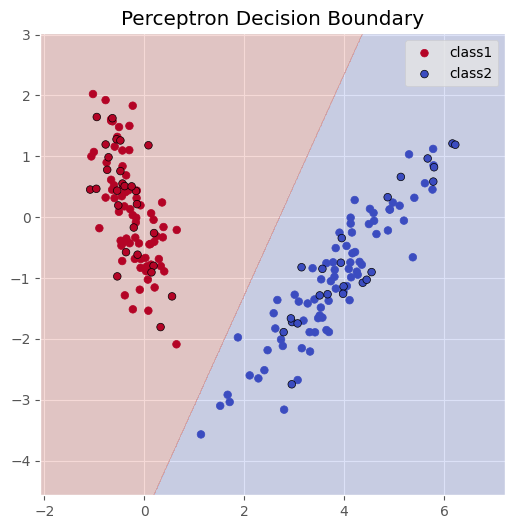

In [12]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Transform grid points using the scaler
grid_points = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_train, cmap='coolwarm', s=30)
plt.scatter(X_test1[:, 0], X_test1[:, 1], c=y_test, cmap='coolwarm', s=30, edgecolors='k')
plt.legend(['class1','class2'])
plt.title("Perceptron Decision Boundary")
plt.show()
